# Dispersión de Rutherford

In [35]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 12 12:35:40 2021

@author: ritav
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so

from IPython.display import display, Latex #para que aparezan as fórmulas no Jupyter



## Fondo

Sen branco nin fonte; sen facer baleiro.

Temos 0 medidas no fondo recollidas ao longo de 2 minutos. Isto deberase a que a radiación $\gamma$ do ambiente é baixísima e a radiación $\alpha$ que poida haber queda absorbida polos centímetros de aire. 

No caso de facer esta medida unha vez realizado o baleiro, as contas dispáranse (experiencia realizada no laboratorio para mellor comprensión do fenómeno).

## Ángulo de non dispersión

Para isto usamos as medidas tomadas para o perfil do feixe (non teñen moito xeito). Deberían seguir unha distribución gaussiana como se amosa a continuación:



In [6]:
def G(t,a,b,c):
    G=a*np.exp(-((t-b)**2)/(2*c**2))
    return G

t=np.linspace(-(np.pi/180)*25, (np.pi/180)*25, 1000)
Gauss=G(t,1,1,1)


a=57.7219 ; b=-0.0110 ; c=0.0667


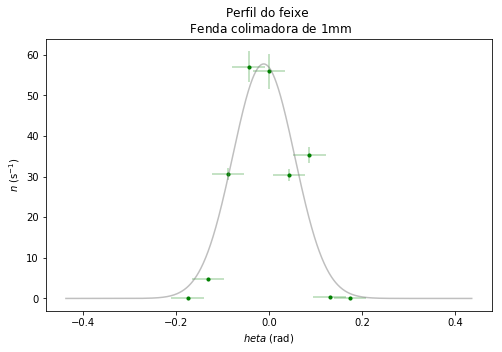

In [38]:
xperfil=(np.pi/180)*np.array([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10])
nperfil=np.array([0.027777778, 4.691666667, 30.60606061, 57.04761905, 55.94444444, 30.42424242, 35.32142857, 0.462184874, 0])
snperfil=np.array([0.012424097, 0.20368026, 1.507143109, 3.774556239, 4.266320371, 1.500016513, 1.935958136, 0.06250981, 0])

fig1=plt.subplots(1, 1, figsize=(8,5))
plt.plot(xperfil,nperfil,'g.')
coef=so.curve_fit(G, xperfil, nperfil)
yfit=G(t,coef[0][0],coef[0][1],coef[0][2])
plt.plot(t, yfit, color= 'grey', ls='-', alpha=0.5)
plt.xlabel(u'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(u'$n$ $\mathrm{(s^{-1})}$')
plt.errorbar(xperfil, nperfil, yerr=snperfil, xerr=np.pi/90, fmt="g.", alpha=0.3)

plt.title(u'Perfil do feixe \n Fenda colimadora de $1\mathrm{mm}$')

print'a=%.4f ; b=%.4f ; c=%.4f' % (coef[0][0],coef[0][1],coef[0][2])

O máximo desta curva está en $-2.5\degree$ pero non temos unha curva simétrica arredor deste punto tampouco. Ademais, vendo o resto de gráficas non percibimos un bias claro cara a este valor, tampouco.

Polo tanto, tomamos o 0 como o ángulo de non dispersión.

Aínda así, observamos que tomando en consideración as incertezas asociadas aos valores, case todos os valores tocan na curva esperada. Con todo, non é un resultado tan insatisfactorio como parecía durante a realización da experiencia.


## Dispersión de Rutherford

Agora graficaremos o número de contas en cada un dos casos con branco, en función do ángulo do detector respecto do branco e a fonte. Esperamos obter algo similar á dispersión de Rutherford:






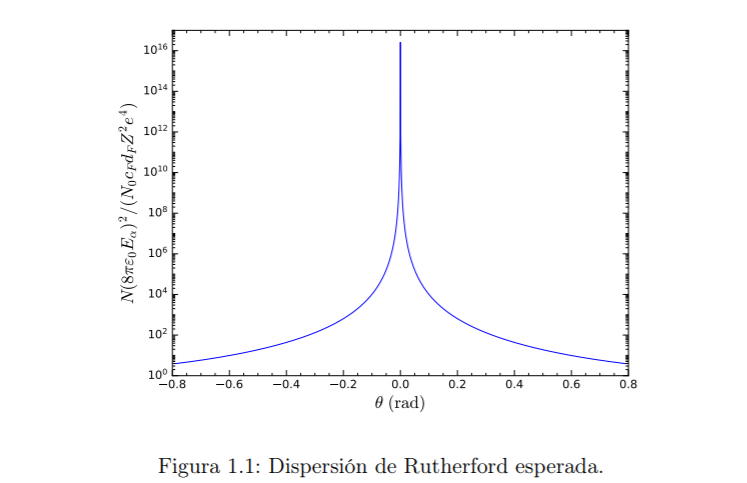
(esta gráfica é da memoria de Javi Mariño do ano pasado, igual habería que facer unha gráfica nova ou simplement poñelo en bibliografía)

que obedece á fórmula:




$$N_d\propto N_0\frac{Z^2e^4}{E_\alpha^2}\frac{1}{sen^4(\frac{\theta}{2})}$$


In [23]:
def N(t,A):
    N=A/((np.sin(t/2))**4)
    return N

 A=0.0004


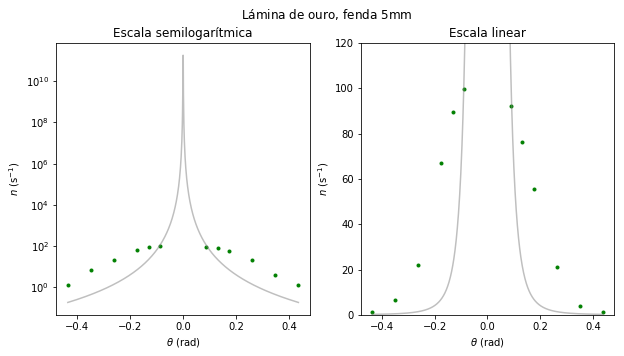

In [94]:
xORO5=(np.pi/180)*np.array([-25, -20, -15, -10, -7.5, -5, 5, 7.5, 10, 15, 20, 25])
nORO5=np.array([1.322222222, 6.533333333, 21.925, 66.83333333, 89.6, 99.51724138, 92.37931034, 76.4, 55.53333333, 21.2, 3.844444444, 1.338888889])
snORO5=np.array([0.056797597, 0.013355876, 0.01643606, 0.041756122, 0.041716462, 0.043143818, 0.043150295, 0.041735139, 0.041796169, 0.021705091, 0.016493227])


fORO5, axsORO5 = plt.subplots(2,2,figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(xORO5,nORO5,'g.')
coefORO5=so.curve_fit(N, xORO5, nORO5)
yfitORO5=N(t,coefORO5[0][0])
plt.plot(t, yfitORO5, color='grey', ls='-', alpha=0.5)
plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
#plt.errorbar(xORO5, nORO5, yerr=snORO5, fmt="g.", alpha=0.3)
plt.title(u'Escala semilogarítmica')
plt.semilogy()




plt.subplot(1, 2, 2)
plt.plot(xORO5,nORO5,'g.')
coefORO5=so.curve_fit(N, xORO5, nORO5)
yfitORO5=N(t,coefORO5[0][0])
plt.plot(t, yfitORO5, color='grey', ls='-', alpha=0.5)
plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
#plt.errorbar(xORO5, nORO5, yerr=snORO5, xerr=np.pi/90, fmt="g.", alpha=0.3)
plt.title('Escala linear')
plt.ylim(0,120)

plt.suptitle(u'Lámina de ouro, fenda $5\mathrm{mm}$')


print ' A=%.4f' % coefORO5[0][0]

 A=0.0004


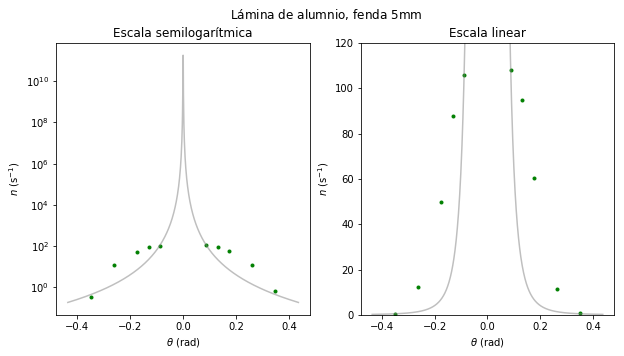

In [84]:
xAL5=(np.pi/180)*np.array([-20, -15, -10, -7.5, -5, 5, 7.5, 10, 15, 20])
nAL5=np.array([0.341666667, 12.14, 49.71666667, 87.6, 106, 108.0666667, 95.03333333, 60.25, 11.48666667, 0.629166667])
snAL5=np.array([0.188997795, 0.010708833, 0.020994539, 0.04171876, 0.041702251, 0.041700904, 0.041710933, 0.020943234, 0.010953133, 0.102727703])


fAL5, axsAL5 = plt.subplots(2,2,figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(xAL5,nAL5,'g.')
coefAL5=so.curve_fit(N, xORO5, nORO5)
yfitAL5=N(t,coefAL5[0][0])
plt.plot(t, yfitAL5, color='grey', ls='-', alpha=0.5)
plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
#plt.errorbar(xAL5, nAL5, yerr=snAL5, xerr=np.pi/90, fmt="g.", alpha=0.3)
plt.title(u'Escala semilogarítmica')
plt.semilogy()


plt.subplot(1, 2, 2)
plt.plot(xAL5,nAL5,'g.')
coefAL5=so.curve_fit(N, xORO5, nORO5)
yfitAL5=N(t,coefAL5[0][0])
plt.plot(t, yfitAL5, color='grey', ls='-', alpha=0.5)
plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
#plt.errorbar(xAL5, nAL5, yerr=snAL5, xerr=np.pi/90, fmt="g.", alpha=0.3)
plt.title('Escala linear')
plt.ylim(0,120)

plt.suptitle(u'Lámina de alumnio, fenda $5\mathrm{mm}$')

print ' A=%.4f' % coefAL5[0][0]

 A=0.0004


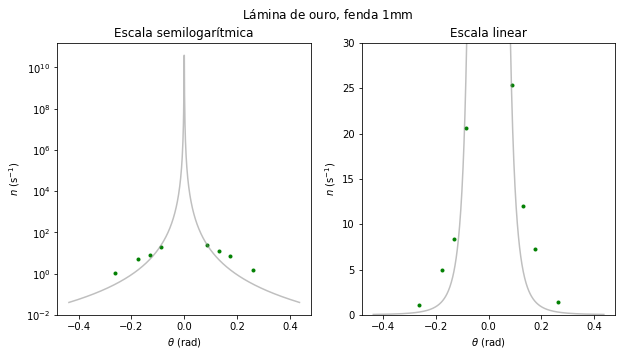

In [87]:
xORO1=(np.pi/180)*np.array([-15, -10, -7.5, -5, 5, 7.5, 10, 15])
nORO1=np.array([1.111111111, 4.916666667, 8.34, 20.66666667, 25.4, 11.99, 7.283333333, 1.444444444])
snORO1=np.array([0.067440532, 0.021289328, 0.017321082, 0.021749704, 0.021444374, 0.015026987, 0.016297254, 0.052066757])

fORO1, axsORO1 = plt.subplots(2,2,figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(xORO1,nORO1,'g.')
coefORO1=so.curve_fit(N, xORO1, nORO1)
yfitORO1=N(t,coefORO1[0][0])
plt.plot(t, yfitORO1, color='grey', ls='-', alpha=0.5)
plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
#plt.errorbar(xORO1, nORO1, yerr=snORO1, xerr=np.pi/90, fmt="g.", alpha=0.3)
plt.title(u'Escala semilogarítmica')
plt.semilogy()

plt.subplot(1, 2, 2)
plt.plot(xORO1,nORO1,'g.')
coefORO1=so.curve_fit(N, xORO1, nORO1)
yfitORO1=N(t,coefORO1[0][0])
plt.plot(t, yfitORO1, color='grey', ls='-', alpha=0.5)
plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
#plt.errorbar(xORO1, nORO1, yerr=snORO1, xerr=np.pi/90, fmt="g.", alpha=0.3)
plt.title(u'Escala linear')
plt.ylim(0,30)

plt.suptitle(u'Lámina de ouro, fenda $1\mathrm{mm}$')

print ' A=%.4f' % coefAL5[0][0]

 A=0.0001


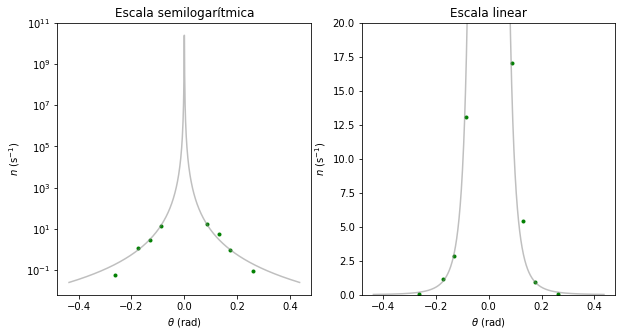

In [88]:
xAL1=(np.pi/180)*np.array([-15, -10, -7.5, -5, 5, 7.5, 10, 15])
nAL1=np.array([0.055555556, 1.147619048, 2.833333333, 13.06666667, 17.08888889, 5.4125, 0.966666667, 0.095])
snAL1=np.array([1.341658759, 0.060424093, 0.023370021, 0.016061702, 0.015197008, 0.013013735, 0.071633826, 0.744349167])

fAL1, axsAL1 = plt.subplots(2,2,figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(xAL1,nAL1,'g.')
coefAL1=so.curve_fit(N, xAL1, nAL1)
yfitAL1=N(t,coefAL1[0][0])
plt.plot(t, yfitAL1, color='grey', ls='-', alpha=0.5)
plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
#plt.errorbar(xAL1, nAL1, yerr=snAL1, xerr=np.pi/90, fmt="g.", alpha=0.3)
plt.title(u'Escala semilogarítmica')
plt.semilogy()

plt.subplot(1, 2, 2)
plt.plot(xAL1,nAL1,'g.')
coefAL1=so.curve_fit(N, xAL1, nAL1)
yfitAL1=N(t,coefAL1[0][0])
plt.plot(t, yfitAL1, color='grey', ls='-', alpha=0.5)
plt.xlabel(r'$\theta$ $\mathrm{(rad)}$')
plt.ylabel(r'$n$ $\mathrm{(s^{-1})}$')
#plt.errorbar(xAL1, nAL1, yerr=snAL1, xerr=np.pi/90, fmt="g.", alpha=0.3)
plt.title(u'Escala linear')
plt.ylim(0,20)


print ' A=%.4f' % coefAL1[0][0]

## Sección eficaz diferencial

Representamos a sección eficaz diferencial obtida experimentalmente aplicando $\displaystyle \frac{d\sigma}{d\Omega}=\frac{n}{n_{0, máx}}\frac{A}{N_a\rho}\frac{r^2}{st}$ e a teórica de $\displaystyle \frac{d\sigma}{d\Omega}=\left(\frac{zZe^2}{4\pi\epsilon_04E}\right)^2\frac{1}{sen^4\left(\frac{\theta}{2}\right)}$.

No cálculo teórico aparece a enerxía das partículas $\alpha$, que non coñecemos, polo que temos que renormalizar estes valores (escollendo unha parella de valores para o mesmo ángulo, e atopando con eles o factor de proporcionalidade). Este factor de proporción será a enerxía cadrada.

`Escollín para a normalización o valor medio das proporcións, pero no guión pon de facelo co valor nun dos ángulos; daquel aeu escollería $2.5\degree$ por ser o que máis se axusta á predición de Rutherford na gráfica anterior`


O factor escollido para a renormalización é 6.83503119016091E+24, polo que a enerxía das partículas será este factor multiplicado polo cociente

[]

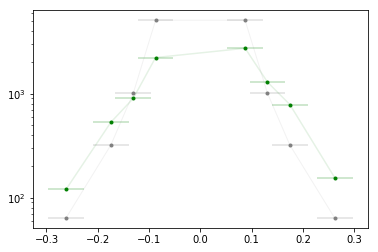

In [112]:
secORO1=np.array([119.8207069, 530.2066279, 899.3742257, 2228.665148, 2739.101359, 1292.985248, 785.4247335, 155.7669189])
ssecORO1=np.array([1.27784E-12, 4.17569E-12, 7.07147E-12, 1.75168E-11, 2.15277E-11, 1.01631E-11, 6.17601E-12, 1.39401E-12])

sectORO1=np.array([4.34608E+26, 2.18627E+27, 6.89436E+27, 3.48473E+28, 3.48473E+28, 6.89436E+27, 2.18627E+27, 4.34608E+26])/6.83503E+24
ssectORO1=np.array([3.78675E+22, 9.24095E+22, 6.06431E+21, 5.43092E+21, 5.43092E+21, 6.06431E+21, 9.24095E+22, 3.78675E+22])/6.83503E+24


plt.plot(xORO1,secORO1, 'g.')
plt.plot(xORO1,secORO1, 'g', ls='-', alpha=0.1)
plt.errorbar(xORO1, secORO1, yerr=ssecORO1, xerr=np.pi/90, ls='', color='g', alpha=0.25)

plt.plot(xORO1,sectORO1, color='grey', marker='.', ls='')
plt.plot(xORO1,sectORO1, 'grey', ls='-', lw=1, alpha=0.1)
plt.errorbar(xORO1, sectORO1, yerr=ssecORO1, xerr=np.pi/90, ls='', color='grey', alpha=0.25)
plt.semilogy()

Agora temos que representar como varía a relación entre a predición teórica (unha vez renormalizada) e os resultados experimentais segundo o ángulo `(tamén hai que incluír unha táboa, aparentemente)`.

<ErrorbarContainer object of 3 artists>

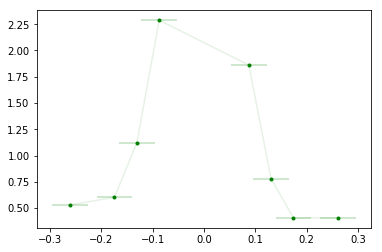

In [114]:
prop=np.array([0.530652147, 0.603258281, 1.121496518, 2.287543757, 1.861256075, 0.780090155, 0.407233851, 0.408193959])
sprop=np.array([0.000164189, 7.00639E-05, 7.84286E-07, 6.81271E-08, 8.37304E-08, 1.12753E-06, 0.00010379, 0.000213446])

plt.plot(xORO1,prop, 'g.')
plt.plot(xORO1,prop, 'g', ls='-', alpha=0.1)
plt.errorbar(xORO1, prop, yerr=sprop, xerr=np.pi/90, ls='', color='g', alpha=0.25)


`Habería que calcular ou obter dalgún xeito a distancia de mínimo achegamento pero non teño nin idea de como xd`

`Tamén deberiamos extrapolar os datos da fenda de 1mm para a de 5mm, pero de que láminas? cos datos da de ouro, aplicalo na de aluminio, e comprobar os resultados? No guión pon que habería que usar a fenda de 5mm para obter os recontos en ángulos grandes, pero nós medimos igualmente coa fenda pequena; entón, non sei para que o temos que usar.`